# Becoming CNN Literate

### Introduction

Now it's time to begin working with convolutions in neural network.  Just to set expectations, when completing these lessons, the point is not to have the ability to construct or *architect* our own neural networks.  The architecture of neural networks is something that we can find online, or even wholesale adopt.

But it would be nice to become more *literate* in the structure of a neural network.  For us, a main component is understanding the dimensions of each layer.  Once again, this is a skill that will develop with time, but hopefully this lesson can offer a good starting point.

### Shaping the Data

Let's begin by loading up our Mnist dataset.

In [61]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [62]:
from torch import tensor
X_tensor = tensor(X)

If we look at the initial shape of the image, we see that we have a separate row 784 pixels for each observation.

In [63]:
X_tensor[0].shape

torch.Size([784])

Now for a convolutional neural network instead of passing through our data through one long vector of pixels, we should reshape our data so that it comes in as our image, in a matrix of $28x28$ pixels.

In [64]:
X_grid = X_tensor.reshape(70000, 28, 28)

In [65]:
X_grid.shape

torch.Size([70000, 28, 28])

* Batches

Perhaps the next thing that we can do is place reshape our data in batches.  Let's place reshape our data in batches of 50, meaning that we will have a total of 1400 batches.

In [66]:
70000/50

1400.0

In [67]:
X_batched = X_grid.reshape(1400, 50, 28, 28)
X_batched.shape

torch.Size([1400, 50, 28, 28])

So now the first element represents a batch of 28x28 images.

In [68]:
X_batched[0].shape

torch.Size([50, 28, 28])

* Channels

Now that we've organized our data into batches, perhaps surprisingly, we'll need to add another dimension for each image.  Here's what's going on.

We can see that a single image is a 28x28 matrix.

In [69]:
X_batched[0][0].shape

torch.Size([28, 28])

The issue is that if we were to work with color images, each image would not be represented by *a single grid* of 28x28 pixels, but rather *three grids* to represent the amount of red, green and blue for each pixel.

<img src="./rgb-pixels.png" width="40%"> 

> Image from Fast.ai 

These grids are referred to as channels.  So for a color image, there are three channels, and for a grayscale image there is a single grid, and one channel.


Now, we're not going to work with color images, so instead of three grids, we'll only have one.  But we'll still need to shape our data to indicate the number of channels.  

> We can do this with the `unsqueeze` method.

The unsqueeze method will add an extra dimension to our data.  We should note that it is *destructive* so only press shift enter one time.

In [70]:
X_batched.shape

torch.Size([1400, 50, 28, 28])

In [71]:
X_with_channel = X_batched.unsqueeze_(2)

In [72]:
X_with_channel.shape

torch.Size([1400, 50, 1, 28, 28])

> Notice that as an argument to the unsqueeze method, we pass the index where we would like the dimension added.  Here, we would like to add an extra dimension after. the `1400, 50`, at index 2. 

So now we see that each image is a 1x28x28.  In other words, we have a tensor that holds one grid of 28 x 28 pixels.  

> If we had a color image, we would have a tensor that holds 3 grids of 28x28 pixels, and each image would be of dimensions 3x28x28.

In [74]:
X_with_channel[0][0].shape

torch.Size([1, 28, 28])

### Initial Parameters

Ok, now let's try start working with a convolutional layer in Pytorch.

In [75]:
from torch.nn import Conv2d

Now for a Conv2d, we'll need to provide parameters of `in_channels`, `out_channels`, and `kernel_size`.  Let's move through each of these in turn.

1. `in_channels` The number of in_channels here is `1`, as we are working with a grayscale image.  It would be three if we were working with an rgb image.

2. `out_channels` is the number of grids returned from the convolution for each image.  Remember that this will be determined by the number of kernels in a layer, so really `out_channels` specifies the number of kernels in a layer.

3. `kernel_size`: This is a single number that specifies the size of the kernel.  So a `3` means a `3x3` kernel.

Ok, let's see this in action.  We'll initialize layer that has one channel, six out channels (for six kernels), where each kernel is a 5x5 matrix.

In [77]:
conv = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)

In [80]:
conv(X_with_channel[0].float()).shape

torch.Size([50, 6, 24, 24])

In [ ]:
Conv2d()

We'll ultimately use this as a convolutional layer as part of a broader neural network.  For example, this initialization code for a neural network we'll work with later on.

In [76]:
import torch.nn as nn
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

But for now, it's good to get a sense of what's occurring with an individual convolutional layer.

When the documentation says that number of input channels in a convolution, it means the number of dimensions to represent a single pixel.  For example, in a color image there would be three channels, and thus three different 

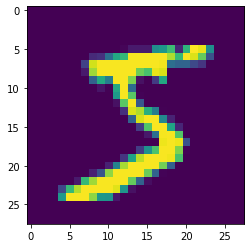

In [15]:
from matplotlib.pyplot import imshow

imshow(first_img)

In [77]:
import torch
x = torch.randn(10, 1, 28, 28)

In [80]:
x.shape

torch.Size([10, 1, 28, 28])

In [98]:
X_tensor = tensor(X_reshaped)

In [99]:
X_with_channel = X_tensor.unsqueeze_(1)

In [118]:
X_tensor.shape

torch.Size([70000, 1, 28, 28])

In [125]:
# n, c, h, w
model = Conv2d(1, 6, 3, 2)

In [126]:
output = model(X_tensor.float())

In [127]:
output.shape

torch.Size([70000, 6, 13, 13])

In [142]:
# model_1 = Conv2d(6, 6, 3, 2)

### Network

In [163]:
import torch.nn

def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

In [156]:
class Flatten():
    def forward(self, x): return x.view(x.size(0), -1)

In [166]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        nn.Sequential(
            conv(1 ,4),            #14x14
            conv(4 ,8),            #7x7
            conv(8 ,16),           #4x4
            conv(16,32),           #2x2
            conv(32,2, act=False)
        )
        
        

### Tensor Calculus

In [135]:
X_batched = X_tensor.view([5000, 14, 28, 28])

In [136]:
X_batched[0].shape

torch.Size([14, 28, 28])

In [137]:
conv = Conv2d(in_channels = 1,
       out_channels = 6, kernel_size = 3,
              stride =1 , padding = 1)
# model = nn.Conv2d(3, 6, 3, 1, 1)

In [61]:
import numpy as np
kernel = np.array([[-1,0,1],
       [ -1, 0, 1],
       [ -1, 0, 1]])

In [141]:
X_tensors = tensor(X_reshaped)

In [63]:
correct_shape = X_tensors[0].view([1,1,28,28])
# 1 batch size, 1 channel, 28, 28 

In [140]:
from torch import tensor
# conv.conv2d_forward(correct_shape, tensor(kernel)[None])

Perhaps it's time to give some intuition about the shape of inputs and outputs for with a kernel.  

<img src="cnn-algebra.png" width="60%">

* $i = 4$
* $k = 3$

<img src="http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif" width="40%">

In [88]:
i = 4
k = 3
output = i - k + 1
output

2

> We can see this above, as there is a 2 by 2 output.

With padding:
    
$output = i - k + 2p + 1$

* Remember that our output is defined as the dimensions of a square.  So the above is saying if there is one row of padding on each side, that our horizontal dimensions increase by two.  It also means that the vertical dimensions increase by two.

### Strides

<img src="http://deeplearning.net/software/theano/_images/no_padding_strides.gif" width="40%"> 

Here the calculus is: $o = \frac{i - k}{s} + 1$

In [2]:
(28 - 3)/2

12.5

In [132]:
from torch import nn
def PoolFlatten()->nn.Sequential:
    "Apply `nn.AdaptiveAvgPool2d` to `x` and then flatten the result."
    return nn.Sequential(nn.AdaptiveAvgPool2d(1), Flatten())



### Resources

[Analytics Image Classification](https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/)